In [1]:
import sys
sys.path.insert(0, "../../code")

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from datasets import *

In [4]:
d = Datasets('../../data')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (10,11,12,13,14,16,17,20,21,22,23,24,25,27,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [5]:
len(d.ssi)

672484

In [6]:
display(d.ssi.head())

,MODIFICATION FLAG,RECORD KEY,BIC OWNER,INSTITUTION NAME OWNER,CITY OWNER,ISO COUNTRY CODE OWNER,ISO CURRENCY CODE,ASSET CATEGORY,BIC ACCOUNT HOLDING INSTITUTION,INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,...,EID ACCOUNT HOLDING INSTITUTION,UPDATE DATE,TRAFFIC FLAG,TRAFFIC DATE,START DATE,STOP DATE,FIELD A,FIELD B,FIELD C,FIELD D
0,A,SI0000000004,BLNISDKHXXX,BLUE NILE MASHREG BANK,KHARTOUM,SD,AED,ANYY,BOMLAEADXXX,MASHREQBANK PSC.,...,NaN,20171120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,SI0000000016,UNILPKKAXXX,UNITED BANK LIMITED,KARACHI,PK,AED,ANYY,UNILAEADXXX,UNITED BANK LTD.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,SI0000000031,ALSABHBMXXX,AL SALAM BANK BAHRAIN,MANAMA,BH,AED,ANYY,ABDIAEADXXX,ABU DHABI ISLAMIC BANK,...,NaN,20170207.0,NaN,NaN,20110101.0,NaN,NaN,NaN,NaN,NaN
3,A,SI0000000046,AUBBBHBMXXX,AHLI UNITED BANK B.S.C.,MANAMA,BH,AED,ANYY,NBADAEAAVOS,FIRST ABU DHABI BANK PJSC,...,NaN,20170328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,SI0000000047,AUBBBHBMXXX,AHLI UNITED BANK B.S.C.,MANAMA,BH,LYD,ANYY,UNCNLYLTXXX,UNITED BANK FOR COMMERCE AND INVESTMENT,...,NaN,20170328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(d.bdp.head())

,MODIFICATION FLAG,RECORD KEY,OFFICE TYPE,PARENT OFFICE KEY,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION STATUS,...,ISO COUNTRY CODE,TIMEZONE,SUBTYPE INDICATOR,NETWORK CONNECTIVITY,BRANCH QUALIFIERS,SERVICE CODES,SSI GROUP KEY,IBAN KEY,FIELD A,FIELD B
0,A,BD000000DAMC,FB,BD000000DAMD,BD000000DAMD,B,BD000000DAMD,Member,BD000000DAMD,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DAMC,NaN,NaN,NaN
1,A,BD000000DBB1,HO,BD000000DBB1,BD000000DBB1,L,BD000000DBB1,Member,BD000000DBB2,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DBB1,NaN,NaN,NaN
2,A,BD000000DBES,FB,BD000000DBET,BD000000DBET,B,BD000000DBET,Member,BD000000DBET,BANK,...,BQ,B,SUPE,CNN,NaN,FIN,BD000000DBES,NaN,NaN,NaN
3,A,BD000000I8PJ,FB,BD000000DBH8,BD000000DBH8,B,BD000000DBH8,Member,BD00000037HJ,BANK,...,BQ,B,SUPE,CNN,NaN,FINSCO,BD000000I8PJ,NaN,NaN,NaN
4,A,BD000000I8Q5,SF,BD000000I8PJ,BD000000DBH8,B,BD000000I8PJ,Member,BD00000037HJ,BANK,...,BQ,S,SUPE,CNN,NaN,FINSCO,BD000000I8Q5,NaN,NaN,NaN


In [8]:
d.ssi.head().T

,0,1,2,3,4
MODIFICATION FLAG,A,A,A,A,A
RECORD KEY,SI0000000004,SI0000000016,SI0000000031,SI0000000046,SI0000000047
BIC OWNER,BLNISDKHXXX,UNILPKKAXXX,ALSABHBMXXX,AUBBBHBMXXX,AUBBBHBMXXX
INSTITUTION NAME OWNER,BLUE NILE MASHREG BANK,UNITED BANK LIMITED,AL SALAM BANK BAHRAIN,AHLI UNITED BANK B.S.C.,AHLI UNITED BANK B.S.C.
CITY OWNER,KHARTOUM,KARACHI,MANAMA,MANAMA,MANAMA
ISO COUNTRY CODE OWNER,SD,PK,BH,BH,BH
ISO CURRENCY CODE,AED,AED,AED,AED,LYD
ASSET CATEGORY,ANYY,ANYY,ANYY,ANYY,ANYY
BIC ACCOUNT HOLDING INSTITUTION,BOMLAEADXXX,UNILAEADXXX,ABDIAEADXXX,NBADAEAAVOS,UNCNLYLTXXX
INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,MASHREQBANK PSC.,UNITED BANK LTD.,ABU DHABI ISLAMIC BANK,FIRST ABU DHABI BANK PJSC,UNITED BANK FOR COMMERCE AND INVESTMENT


In [9]:
d.ssi[['BIC OWNER', 'BIC ACCOUNT HOLDING INSTITUTION', 'ACCOUNT HOLDING INSTITUTION TYPE']].sample(5)

,BIC OWNER,BIC ACCOUNT HOLDING INSTITUTION,ACCOUNT HOLDING INSTITUTION TYPE
252120,DEUTDE3B480,DEUTDEFFXXX,LOCAL CORRESPONDENT
290012,BKTWUS33XXX,DEUTDEFFXXX,CORRESPONDENT
578449,GENODE61WO1,NBOKKWKWXXX,CORRESPONDENT
496603,ANZBVUVXXXX,CHASGB2LBUL,LOCAL CORRESPONDENT
370690,GENODE51FUL,COMMCNSHXXX,CORRESPONDENT


In [10]:
ssi_keys_df = d.ssi[[
    'BIC OWNER', 'BIC ACCOUNT HOLDING INSTITUTION', 'ACCOUNT HOLDING INSTITUTION TYPE'
]]

In [11]:
ssi_nx = nx.from_pandas_edgelist(
    ssi_keys_df,
    source = 'BIC OWNER',
    target = 'BIC ACCOUNT HOLDING INSTITUTION',
    edge_attr = 'ACCOUNT HOLDING INSTITUTION TYPE',
    create_using = nx.Graph
)

In [12]:
print(nx.info(ssi_nx))

Name: 
Type: Graph
Number of nodes: 17783
Number of edges: 167510
Average degree:  18.8393


In [13]:
nx.number_connected_components(ssi_nx)

59

In [14]:
ssi_comp = list(nx.connected_components(ssi_nx))

In [15]:
ssi_comp_sizes = list(enumerate(map(len, ssi_comp)))

In [16]:
nx.density(ssi_nx)

0.0010594613060171982

In [17]:
nx.number_of_selfloops(ssi_nx)

937

In [18]:
ssi_degree_histogram = nx.degree_histogram(ssi_nx)

In [19]:
ssi_degree_histogram_indexed = list(zip(range(len(ssi_degree_histogram)), ssi_degree_histogram))

In [20]:
ssi_degree_histogram_indexed[61]

(61, 12)

In [21]:
sixtyoney_nodes = [ 
    node for node in nx.nodes(ssi_nx)
    if len(list(nx.all_neighbors(ssi_nx, node))) in range(61, 70) 
]

In [22]:
len(sixtyoney_nodes)

60

In [23]:
ssi_sixtyoney_sub_nx = nx.subgraph(ssi_nx, sixtyoney_nodes)

In [24]:
print(nx.info(ssi_sixtyoney_sub_nx))

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 59
Average degree:   1.9667


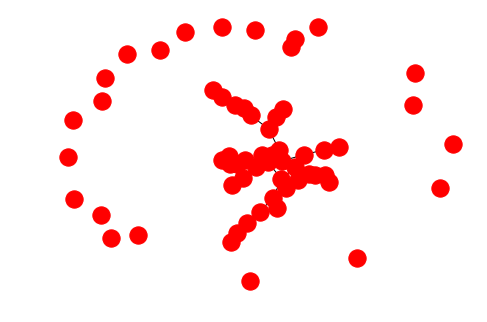

In [25]:
nx.draw(ssi_sixtyoney_sub_nx)

In [26]:
# display(d.bdp.sample(5).T)

In [27]:
dbp_keys_df = d.bdp[[
    'RECORD KEY', 'OFFICE TYPE', 'HEAD OFFICE KEY',
    'LEGAL TYPE',
    'LEGAL PARENT KEY',
    'GROUP TYPE',
    'GROUP PARENT KEY',
    'INSTITUTION NAME',
    'COUNTRY NAME',
    'ISO COUNTRY CODE',
]]

In [28]:
display(d.ssi.sample(5).T)

,142412,389267,80623,513830,41572
MODIFICATION FLAG,A,A,A,A,A
RECORD KEY,SI00000060NJ,SI000000L708,SI000001DDHF,SI00000186KP,SI0000012516
BIC OWNER,GENODEF1KS2,SGABCHZZXXX,BCCGCDKSXXX,CRESCHZZ25F,HELADEF1KOR
INSTITUTION NAME OWNER,KURHESSISCHE LANDBANK EG,"SOCIETE GENERALE, PARIS, ZURICH BRANCH",BANQUE CENTRALE DU CONGO,CREDIT SUISSE (SCHWEIZ) AG,SPARKASSE WALDECK-FRANKENBERG
CITY OWNER,KASSEL,ZURICH,KINSHASA,"NEUVEVILLE, LA",KORBACH
ISO COUNTRY CODE OWNER,DE,CH,CD,CH,DE
ISO CURRENCY CODE,HUF,ILS,USD,PHP,HKD
ASSET CATEGORY,COPA,FOEX,ANYY,DERI,ANYY
BIC ACCOUNT HOLDING INSTITUTION,MAVOHUHBXXX,SOGEFRPPXXX,BOMMMUPLXXX,CRESCHZZ80A,HELADEFFXXX
INSTITUTION NAME ACCOUNT HOLDING INSTITUTION,SBERBANK MAGYARORSZAG ZRT,SOCIETE GENERALE,BANK OF MAURITIUS,CREDIT SUISSE (SCHWEIZ) AG,LANDESBANK HESSEN-THUERINGEN GIROZENTRALE


In [29]:
display(ssi_keys_df.sample(5))

,BIC OWNER,BIC ACCOUNT HOLDING INSTITUTION,ACCOUNT HOLDING INSTITUTION TYPE
208744,DEUTDE8M811,DEUTDEFFXXX,LOCAL CORRESPONDENT
617561,DEUTDE5M575,DEUTDEFFXXX,LOCAL CORRESPONDENT
311481,RLNWATW1127,RZBAATWWXXX,LOCAL CORRESPONDENT
447153,CIBEEGCX095,CIBEEGCXXXX,LOCAL CORRESPONDENT
46225,ICRAITRRQF0,ICRAITRRXXX,LOCAL CORRESPONDENT


In [30]:
dbp_keys_df.assign(parent = lambda x: np.where(
    x['HEAD OFFICE KEY'].isna(),
    x['GROUP PARENT KEY'],
    x['HEAD OFFICE KEY']
))

,RECORD KEY,OFFICE TYPE,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION NAME,COUNTRY NAME,ISO COUNTRY CODE,parent
0,BD000000DAMC,FB,BD000000DAMD,B,BD000000DAMD,Member,BD000000DAMD,BANCO DI CARIBE N.V. BONAIRE,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DAMD
1,BD000000DBB1,HO,BD000000DBB1,L,BD000000DBB1,Member,BD000000DBB2,MADURO AND CURIEL'S BANK (BONAIRE) NV,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBB1
2,BD000000DBES,FB,BD000000DBET,B,BD000000DBET,Member,BD000000DBET,ORCO BANK N.V. BONAIRE,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBET
3,BD000000I8PJ,FB,BD000000DBH8,B,BD000000DBH8,Member,BD00000037HJ,RBC ROYAL BANK N.V.(FORMERLY RBTT BANK N.V.),"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBH8
4,BD000000I8Q5,SF,BD000000DBH8,B,BD000000I8PJ,Member,BD00000037HJ,RBC ROYAL BANK N.V. (FORMERLY RBTT BANK N.V.),"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000DBH8
5,BD000000KZ2G,HO,BD000000KZ2G,L,BD000000KZ2G,NaN,NaN,BANCO DEL ORINOCO N.V.,"BONAIRE, SINT EUSTATIUS AND SABA",BQ,BD000000KZ2G
6,BD000000DAGW,HO,BD000000DAGW,L,BD000000DAGW,NaN,NaN,ABB INVESTMENT N.V.,CURACAO,CW,BD000000DAGW
7,BD000000DAGY,HO,BD000000DAGY,L,BD000000DAGY,NaN,NaN,ABN-AMRO TRUST COMPANY,CURACAO,CW,BD000000DAGY
8,BD000000DAKS,HO,BD000000DAKS,L,BD000000DAKS,NaN,NaN,BANCO ALIADO INTERNACIONAL NV,CURACAO,CW,BD000000DAKS
9,BD000000DAKV,HO,BD000000DAKV,L,BD000000DAKV,NaN,NaN,BANCO MERCANTIL,CURACAO,CW,BD000000DAKV


In [31]:
display(dbp_keys_df.sample(5))

,RECORD KEY,OFFICE TYPE,HEAD OFFICE KEY,LEGAL TYPE,LEGAL PARENT KEY,GROUP TYPE,GROUP PARENT KEY,INSTITUTION NAME,COUNTRY NAME,ISO COUNTRY CODE
652448,BD000000NLK4,DB,BD000000NLB6,B,BD000000NLB6,NaN,NaN,KARNATAKA GRAMIN BANK,INDIA,IN
455591,BD0000001IK6,DB,BD0000001IUM,B,BD0000001IUM,Member,BD0000001IUM,NATIONAL WESTMINSTER BANK PLC,UNITED KINGDOM,GB
670936,BD000000REIU,DB,BD000000LE7S,B,BD000000LE7S,Member,BD000000LE7S,CANARA BANK,INDIA,IN
752395,BD000000Z87A,DB,BD000000LE7S,B,BD000000LE7S,Member,BD000000LE7S,CANARA BANK,INDIA,IN
979799,BD000000O5LC,DB,BD000000O5KI,B,BD000000O5KI,Member,BD000000O5KI,UNITED BANK FOR AFRICA PLC,NIGERIA,NG


### By Head Office

In [32]:
ssi_dbp_df = d.ssi[[
    'RECORD KEY BDP OWNER',
    'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
]].merge(
    dbp_keys_df[[
        'RECORD KEY',
        'HEAD OFFICE KEY',
    ]].rename(columns = {
        'HEAD OFFICE KEY' : 'OWNER HEAD OFFICE KEY'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP OWNER',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY']).merge(
    dbp_keys_df[[
        'RECORD KEY',
        'HEAD OFFICE KEY',
    ]].rename(columns = {
        'HEAD OFFICE KEY' : 'HOLDER HEAD OFFICE KEY'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY'])

In [33]:
len(ssi_dbp_df)

672484

In [34]:
display(ssi_dbp_df.sample(5))

,RECORD KEY BDP OWNER,RECORD KEY BDP ACCOUNT HOLDING INSTITUTION,OWNER HEAD OFFICE KEY,HOLDER HEAD OFFICE KEY
181881,BD0000001G69,BD0000001G7P,BD0000001G7P,BD0000001G7P
499502,BD0000000MH2,BD0000000MO4,BD0000000MO4,BD0000000MO4
109547,BD0000001EQG,BD0000000L5T,BD0000001EQG,BD000000A2GQ
455080,BD00000000M8,BD0000000ART,BD00000000M8,BD0000000AS5
600205,BD0000000YQP,BD0000000YS4,BD0000000YQP,BD0000000ZGQ


In [35]:
len(ssi_dbp_df['RECORD KEY BDP OWNER'].drop_duplicates())

17117

In [36]:
len(ssi_dbp_df['OWNER HEAD OFFICE KEY'].drop_duplicates())

8110

In [37]:
len(ssi_dbp_df['RECORD KEY BDP ACCOUNT HOLDING INSTITUTION'].drop_duplicates())

4296

In [38]:
len(ssi_dbp_df['HOLDER HEAD OFFICE KEY'].drop_duplicates())

2667

In [39]:
head_office_ssi_nx = nx.from_pandas_edgelist(
    ssi_dbp_df[[
        'OWNER HEAD OFFICE KEY',
        'HOLDER HEAD OFFICE KEY'
    ]].drop_duplicates(),
    source = 'OWNER HEAD OFFICE KEY',
    target = 'HOLDER HEAD OFFICE KEY'
)

In [40]:
print(nx.info(head_office_ssi_nx))

Name: 
Type: Graph
Number of nodes: 8283
Number of edges: 102125
Average degree:  24.6589


In [41]:
print(nx.info(ssi_nx))

Name: 
Type: Graph
Number of nodes: 17783
Number of edges: 167510
Average degree:  18.8393


### By Country

In [42]:
ssi_dbp_country_df = d.ssi[[
    'RECORD KEY BDP OWNER',
    'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
]].merge(
    dbp_keys_df[[
        'RECORD KEY',
        'COUNTRY NAME',
    ]].rename(columns = {
        'COUNTRY NAME' : 'OWNER COUNTRY NAME'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP OWNER',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY']).merge(
    dbp_keys_df[[
        'RECORD KEY',
        'COUNTRY NAME',
    ]].rename(columns = {
        'COUNTRY NAME' : 'HOLDER COUNTRY NAME'
    }),
    how = 'inner',
    left_on = 'RECORD KEY BDP ACCOUNT HOLDING INSTITUTION',
    right_on = 'RECORD KEY'
).drop(columns = ['RECORD KEY'])

In [43]:
len(ssi_dbp_country_df)

672484

In [44]:
display(ssi_dbp_country_df.sample(5))

,RECORD KEY BDP OWNER,RECORD KEY BDP ACCOUNT HOLDING INSTITUTION,OWNER COUNTRY NAME,HOLDER COUNTRY NAME
251082,BD000000NE6E,BD0000000AS5,TAIWAN,THAILAND
415729,BD0000002BIW,BD0000000L4M,AUSTRALIA,UNITED KINGDOM
614,BD0000008CW4,BD000000ENI3,INDIA,UNITED ARAB EMIRATES
539560,BD00000024O2,BD00000024PB,AUSTRIA,AUSTRIA
581638,BD00000026T7,BD00000026YN,UNITED KINGDOM,UNITED KINGDOM


In [45]:
len(ssi_dbp_country_df['OWNER COUNTRY NAME'].drop_duplicates())

224

In [46]:
len(ssi_dbp_country_df['HOLDER COUNTRY NAME'].drop_duplicates())

198

In [47]:
country_ssi_nx = nx.from_pandas_edgelist(
    ssi_dbp_country_df[[
        'OWNER COUNTRY NAME',
        'HOLDER COUNTRY NAME'
    ]].drop_duplicates(),
    source = 'OWNER COUNTRY NAME',
    target = 'HOLDER COUNTRY NAME'
)

In [48]:
print(nx.info(country_ssi_nx))

Name: 
Type: Graph
Number of nodes: 224
Number of edges: 4757
Average degree:  42.4732


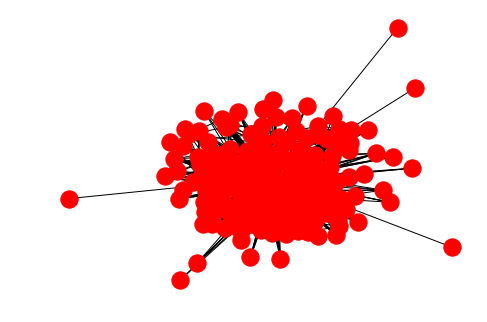

In [49]:
nx.draw_spring(country_ssi_nx)

In [50]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [51]:
display(nx.adjacency_matrix(country_ssi_nx).toarray())

array([[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 